In [1]:
from acquire import *
from prepare import *

import numpy as np
import scipy.stats as stats
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
pd.options.mode.chained_assignment = None

from vega_datasets import data

In [3]:
df = data.sf_temps()
df = df.set_index('date')

                 temp
date                 
2010-01-01  49.170833
2010-01-02  49.304167
2010-01-03  49.391667
2010-01-04  49.445833
2010-01-05  49.491667
...               ...
2010-12-27  48.991667
2010-12-28  49.000000
2010-12-29  49.012500
2010-12-30  49.012500
2010-12-31  49.116667

[365 rows x 1 columns]


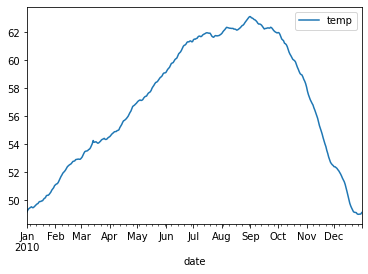

In [4]:
print(df.resample('D').mean())

df.resample('D').mean().plot()
plt.show()

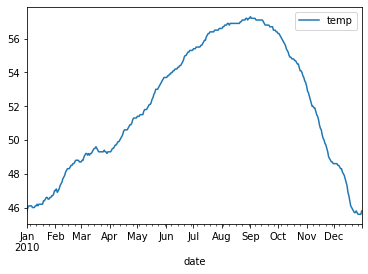

In [5]:
df.resample('D').min().plot()
plt.show()

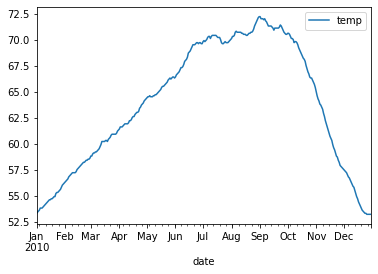

In [6]:
df.resample('D').max().plot()
plt.show()

In [7]:
df['month'] = df.index.month_name()

df.groupby('month').mean().idxmin()
df.groupby('month').mean().sort_values('temp').head(1)

,temp
month,
January,49.98414


In [11]:
display(df.groupby('month').mean().idxmax())

display(df.groupby('month').mean().max())

df_daily = df.resample('D').agg(['min','max'] ).temp
df_daily['temp_diff'] = df_daily['max'] - df_daily['min']
df_daily['month'] = df_daily.index.month_name()
df_daily.groupby('month').max().sort_values('temp_diff', ascending=False).head(1)

temp    September
dtype: object

temp    62.487083
dtype: float64

,min,max,temp_diff
month,,,
August,57.2,72.2,15.0


In [13]:
df = data.seattle_weather()
df = df.set_index('date')

In [16]:
df.index.strftime('%Y-%m')
df['year_month'] = df.index.strftime('%Y-%b')

display(df.groupby('year_month').sum().precipitation.idxmax())
df.groupby('year_month').sum().precipitation.max()

'2015-Dec'

284.5

In [17]:
df['month'] = df.index.month_name()

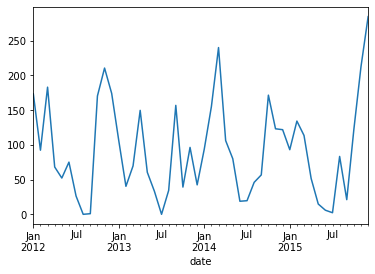

In [18]:
df.resample('M').sum().precipitation.plot()
plt.show()

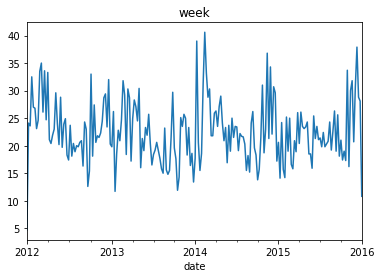

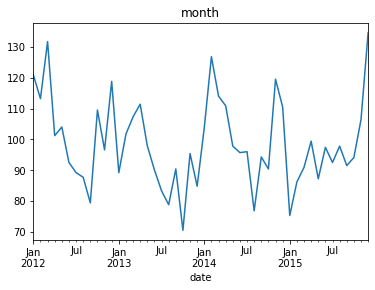

In [19]:
df.resample('W').sum().wind.plot()
plt.title('week')
plt.show()
df.resample('M').sum().wind.plot()
plt.title('month')
plt.show()

In [20]:
display(df.groupby('year_month').sum().wind.idxmax())
df.groupby('year_month').sum().wind.max()

'2015-Dec'

134.6

In [21]:
df['is_sunny'] = (df.weather == 'sun')
df['year'] = df.index.year

df.groupby('year').sum().is_sunny.sort_values().tail(1)

year
2014    211
Name: is_sunny, dtype: int64

In [22]:
df['is_rainy'] = df.weather == 'rain'
display(df.groupby('month').sum().is_rainy.idxmax())
df.groupby('month').sum().is_rainy.max()

'February'

40

In [23]:
df['is_precipitation'] = df.precipitation > 0

display(df.groupby('month').sum().is_precipitation.idxmax())
df.groupby('month').sum().is_precipitation.max()

'December'

81

In [24]:
df = data.flights_20k()
df = df.set_index('date')

In [25]:
df['delay'] = np.where(df.delay<0, 0, df.delay)

In [26]:
df['hour'] = df.index.hour

display(df.groupby('hour').mean().delay.idxmax())
df.groupby('hour').mean().delay.max()

3

302.5

In [27]:
df['weekday'] = df.index.day_name()

df.groupby('weekday').mean().delay.sort_values()

weekday
Monday        7.165772
Saturday      8.431498
Tuesday       9.410866
Sunday       10.413542
Wednesday    11.032478
Thursday     12.821322
Friday       17.757596
Name: delay, dtype: float64

In [28]:
df['month'] = df.index.month_name()

df.groupby('month').mean().delay

month
February    12.306106
January     11.301592
March        9.875287
Name: delay, dtype: float64